# 00 Setup & Warm-up

This notebook guides you through installing **Wandas** and setting up the minimum configuration for interactive displays in Notebooks.

*このノートブックでは **Wandas** をインストールし、Notebook でインタラクティブ表示を行うための最小設定を行います。*

## What is Wandas

Wandas is a Python package for waveform data analysis. It specializes in processing and visualizing time series data, particularly audio, vibration, and sensor data, with the following features:

*Wandasは波形データ解析のためのPythonパッケージです。時系列データ、特に音響・振動・センサーデータの処理と可視化に特化しており、以下のような特徴を持っています：*

- **Fast data processing**: Built on NumPy and Pandas foundations, efficiently handles large datasets  
  *高速なデータ処理: NumPyとPandasの基盤上に構築され、大規模なデータセットも効率的に処理*
- **Intuitive API**: Provides a dataframe-like interface for easily executing complex signal processing operations  
  *直感的なAPI: データフレームのようなインターフェースで複雑な信号処理操作を簡単に実行可能*
- **Interactive visualization**: Integrates with Matplotlib for interactive data exploration and analysis  
  *インタラクティブな可視化: Matplotlibと連携し、データの探索と分析を対話的に実行*
- **Extensibility**: Flexible architecture that allows easy addition of custom processing functions  
  *拡張性: カスタム処理関数を簡単に追加できる柔軟なアーキテクチャ*

## Prerequisites

- Python 3.9 or higher  
  *Python 3.9以上*
- Jupyter environment (Notebook, Lab, or VS Code Notebook, etc.)  
  *Jupyter環境（Notebook, Lab, または VS Code Notebookなど）*

In [1]:
# Install the latest wandas from PyPI
# !pip install wandas

# Install packages required for visualization (if not already installed)
# !pip install ipympl

# Import basic packages
import wandas as wd
import numpy as np
import matplotlib.pyplot as plt

# Check version information
print(f"Wandas: {wd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")


Wandas: 0.1.4
NumPy: 2.0.2
Matplotlib: 3.10.0


In [2]:
# Check backend for interactive graph display
try:
    import ipympl
    print(f"ipympl: {ipympl.__version__} - Interactive features are available")
except ImportError:
    print("ipympl is not installed. Interactive visualization features will be limited.")
    print("To install: pip install ipympl")

ipympl: 0.9.6 - Interactive features are available


## Jupyter and Matplotlib Configuration

To enable interactive zooming and legend operations, we use the `ipympl` backend. This allows mouse operations on graphs (zooming, panning, data point confirmation, etc.).

*インタラクティブなズームや凡例操作を有効にするには `ipympl` バックエンドを使います。これにより、グラフ上でのマウス操作（ズーム、パン、データポイントの確認など）が可能になります。*

`ipympl` stands for "interactive matplotlib" and is a backend for interactive visualization in the Jupyter environment. Compared to regular matplotlib, it offers the following advantages:

*`ipympl`は「インタラクティブmatplotlib」の略で、Jupyter環境でのインタラクティブな可視化を実現するためのバックエンドです。通常のmatplotlibと比べて以下の利点があります：*

- Zooming in/out on graphs  
  *グラフ上でのズームイン/ズームアウト*
- Panning (moving the graph view)  
  *パン（グラフの移動）*
- Displaying data point values  
  *データポイントの値表示*
- Toggling legend display  
  *凡例の表示/非表示の切り替え*
- Resetting the graph view  
  *グラフのリセット*

Use the following command to set up the backend:

*以下のコマンドでバックエンドを設定します：*

In [3]:
%matplotlib widget
plt.rcParams['figure.figsize'] = (8, 3)

## Simple Demo: Creating and Displaying Sine Waves
*簡単なデモ： サイン波の生成と表示*

Let's create and display a simple sine wave to confirm the basic functionality of Wandas.

*Wandasの基本的な機能を確認するために、簡単なサイン波を生成して表示してみましょう。*

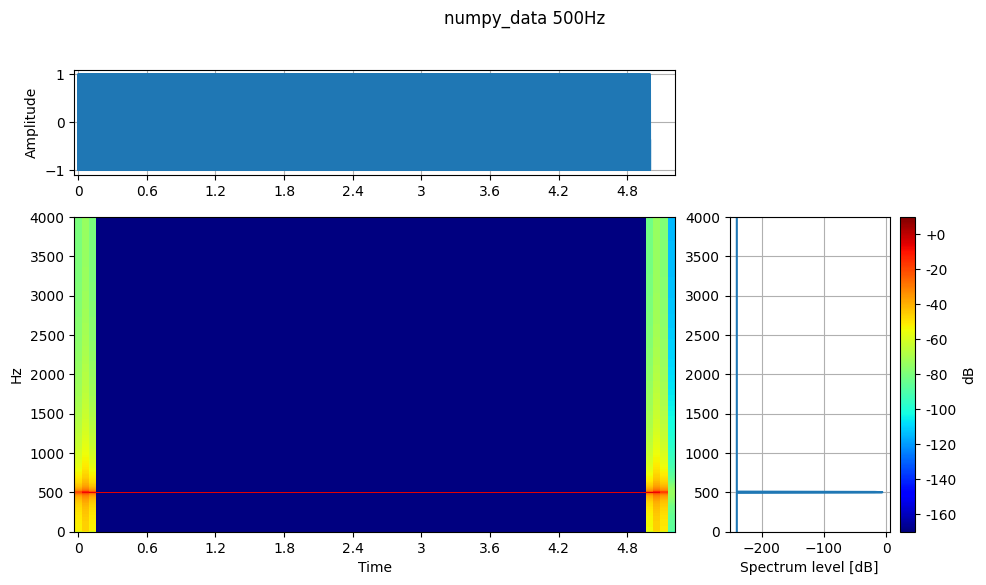

/home/vscode/.venv/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


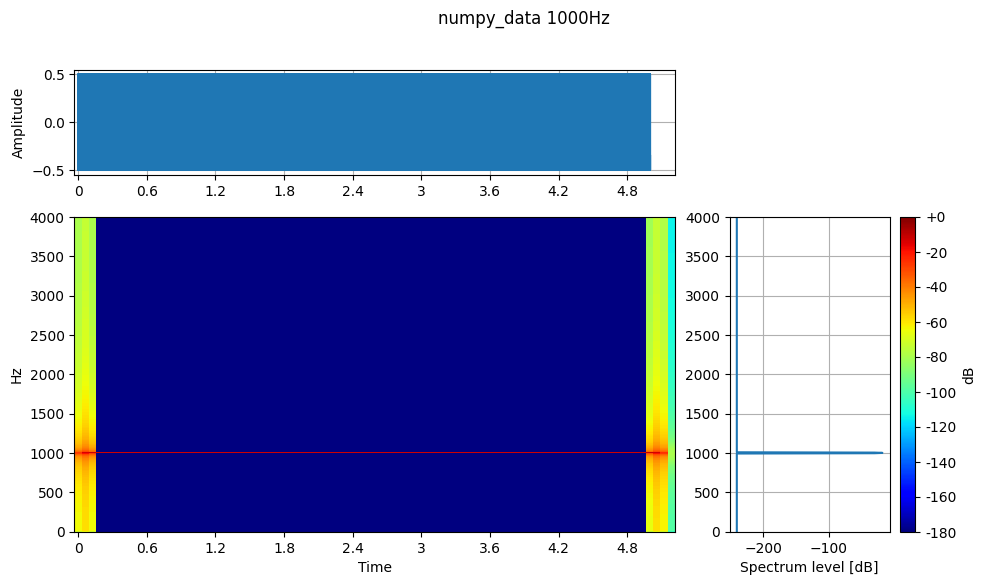

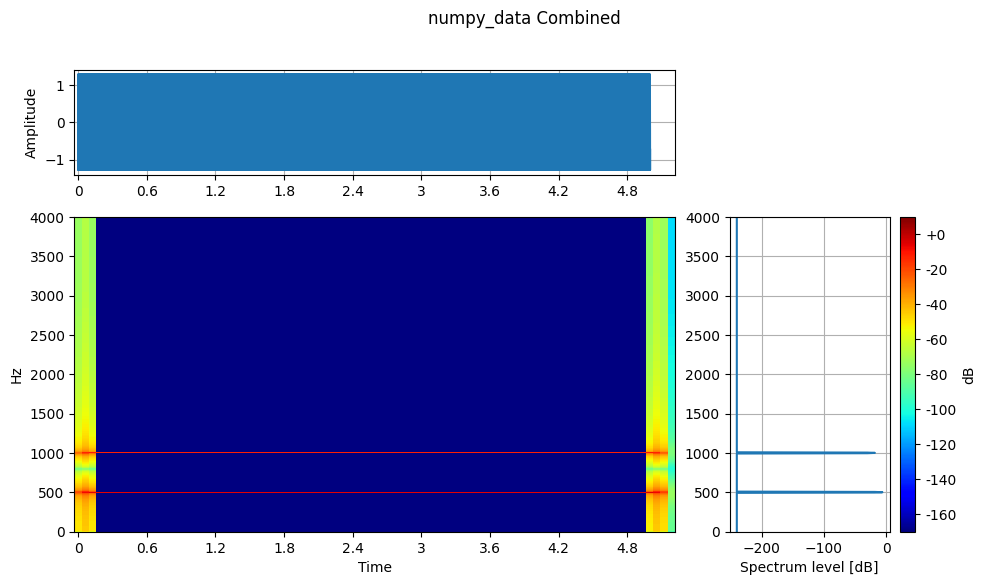

In [4]:
# Generate sample data (sine waves)
sample_rate = 8000  # Sampling rate (Hz)
duration = 5.0     # Signal length (seconds)

# Create time axis
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate two sine waves with different frequencies
freq1, freq2 = 500, 1000  # Frequencies (Hz)
signal1 = np.sin(2 * np.pi * freq1 * t)
signal2 = 0.5 * np.sin(2 * np.pi * freq2 * t)

# Combined signal
signal_combined = signal1 + signal2

# Convert to Wandas channel frame (using from_numpy method)
# Stack each signal into a NumPy array
data = np.vstack([signal1, signal2, signal_combined])
# Specify channel labels
ch_labels = ["500Hz", "1000Hz", "Combined"]
# Use the from_numpy method with correct parameters
chf = wd.from_numpy(
    data=data,
    sampling_rate=sample_rate,
    ch_labels=ch_labels
)

# Plot
chf.describe()

## Troubleshooting
*トラブルシューティング*

If you encounter issues during setup, check the following:

*環境構築中に問題が発生した場合は、以下の点を確認してください：*

1. **Version compatibility**: Ensure you're using Python 3.9 or higher.  
   *バージョンの互換性： Python 3.9以上を使用しているか確認してください。*
2. **ipympl issues**: If interactive display isn't working, try updating to the latest version with `!pip install ipympl --upgrade`.  
   *ipymplの問題： インタラクティブな表示が機能しない場合、`!pip install ipympl --upgrade` で最新版にアップデートしてみてください。*
3. **Jupyter environment**: If using VS Code Notebook, verify that the Jupyter extension is up to date.  
   *Jupyter環境： VS Code Notebookを使用している場合、Jupyter拡張機能が最新版であることを確認してください。*

## Next Steps
*次のステップ*

The basic setup is now complete. Please continue the tutorial in the following order:

*以上で基本的な環境構築は完了です。この後は以下の順序でチュートリアルを進めてください：*

1. **01_io_basics.ipynb**: File reading and writing  
   *ファイルの読み込みと書き込み*
2. **02_signal_processing_basics.ipynb**: Basic signal processing  
   *基本的な信号処理*
3. **03_visualization.ipynb**: Data visualization techniques  
   *データの可視化手法*
4. **04_time_frequency.ipynb**: Time-frequency analysis  
   *時間周波数解析*
5. **05_lazy_evaluation.ipynb**: Improving memory efficiency with lazy evaluation  
   *遅延評価によるメモリ効率の改善*

**Next notebook**: [01_io_basics.ipynb](./01_io_basics.ipynb)  
*次のノートブック： [01_io_basics.ipynb](./01_io_basics.ipynb)*

### Help and Resources
*ヘルプとリソース*

- Official documentation: https://kasahart.github.io/wandas/en/  
  *公式ドキュメント： https://kasahart.github.io/wandas/ja/
- GitHub: https://github.com/kasahart/wandas  
  *GitHub： https://github.com/kasahart/wandas
- Bug reports: https://github.com/kasahart/wandas/issues  
  *バグ報告： https://github.com/kasahart/wandas/issues